<a href="https://colab.research.google.com/github/nafiul-araf/Lab-work/blob/main/k_means_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={
    'figure.figsize':(20, 10)
})


import warnings

warnings.filterwarnings('ignore')

# Loading the Data

In [ ]:
df=pd.read_csv('Copy of Depression and Happiness Factor Analysis.csv')
df.shape

(920, 21)

# Data Preparation

In [ ]:
from my_custom_utils import data_preparation

* Preparing the data using the imported `data_preparation()` function.
```Python
    def data_preparation(data):
  """This funtion is for data preparation which returns the clean data. In order to do this, it drops the unnecessay columns and sets the index. 
  Then it encodes the categorical non-numeric data into numeric data using label encoder.
  Input:
      data: The dataframe.
  
  Output:
      Concatenation of encoded and numeric data.
  """
  data=data.drop(['Timestamp','Unnamed: 20'],axis=1)
  data=data.set_index('Which year are you in?')
  data_numeric=data.drop(data.iloc[:, [0,2,4,5,6,8,9,10,11,12,13,14,15,16]],axis=1)
  data_non_numeric=data.drop(data.iloc[:, [1,3,7,17]],axis=1)
  le=LabelEncoder()
  encode=data_non_numeric.apply(le.fit_transform)

  return pd.concat([encode,data_numeric],axis=1)
```

In [ ]:
df=data_preparation(df)
df.shape

(920, 18)

# Performing Sklearn K-means

### <span style='color:blue'>***Dividing the Data into X and y***</span>

In [ ]:
X=df.drop('How are you feeling right now?', axis=1)
y=df['How are you feeling right now?']

In [ ]:
cols=X.columns

### <span style='color:blue'>***Normalizing the Data***</span>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X=scaler.fit_transform(X)

In [ ]:
X=pd.DataFrame(X, columns=[cols])

### <span style='color:blue'>***Finding the Optimal Possible Clusters using the Elbow Plot***</span>

#### <span style='color:red'>***Trying 10 Clusters***</span>

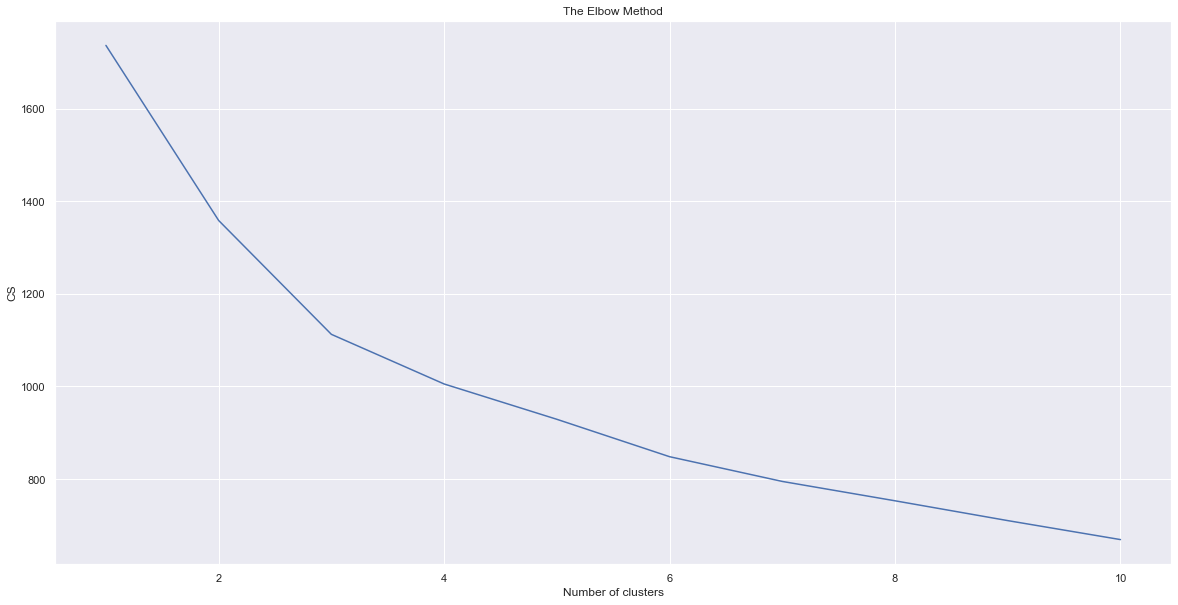

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

#### <span style='color:red'>***Trying 20 Clusters***</span>

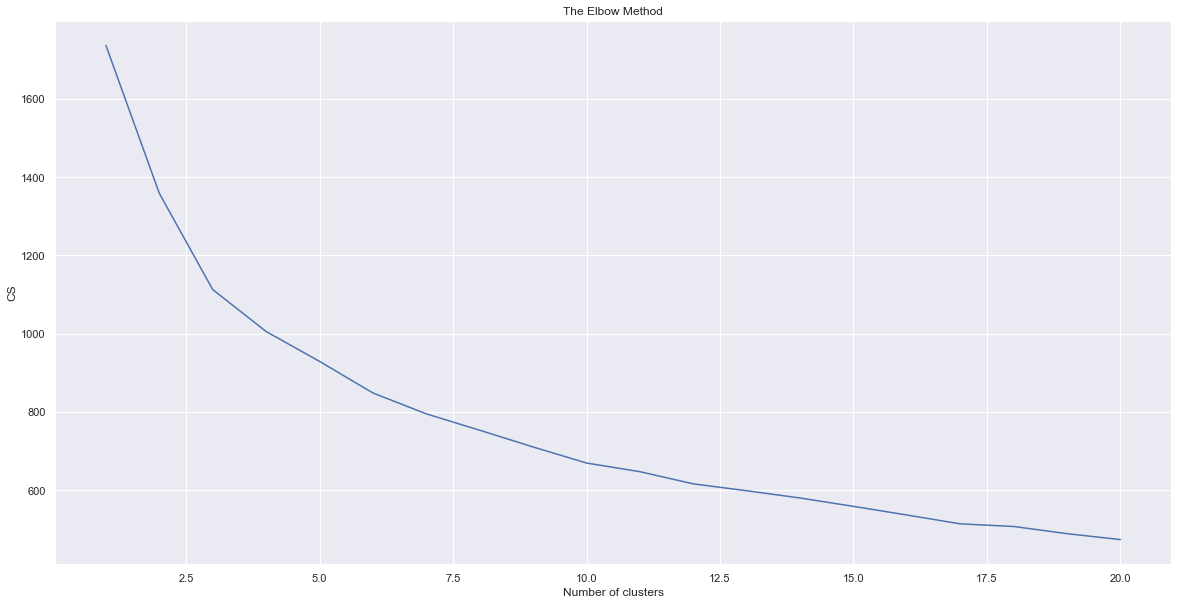

In [ ]:
cs = []
for i in range(1, 21):
    kmeans=KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 21), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

### <span style='color:blue'>***Making the Clusters and Evaluation of them***</span>

In [ ]:
for i in range(1,21):
    kmeans=KMeans(n_clusters=i, random_state=0) 
    kmeans.fit(X)

    labels=kmeans.labels_
    correct_labels=sum(y == labels)
    print('For cluster {}'.format(i))
    print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
    print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))
    print('\n')

For cluster 1
Result: 166 out of 920 samples were correctly labeled.
Accuracy score: 0.18


For cluster 2
Result: 114 out of 920 samples were correctly labeled.
Accuracy score: 0.12


For cluster 3
Result: 167 out of 920 samples were correctly labeled.
Accuracy score: 0.18


For cluster 4
Result: 203 out of 920 samples were correctly labeled.
Accuracy score: 0.22


For cluster 5
Result: 142 out of 920 samples were correctly labeled.
Accuracy score: 0.15


For cluster 6
Result: 140 out of 920 samples were correctly labeled.
Accuracy score: 0.15


For cluster 7
Result: 142 out of 920 samples were correctly labeled.
Accuracy score: 0.15


For cluster 8
Result: 144 out of 920 samples were correctly labeled.
Accuracy score: 0.16


For cluster 9
Result: 61 out of 920 samples were correctly labeled.
Accuracy score: 0.07


For cluster 10
Result: 19 out of 920 samples were correctly labeled.
Accuracy score: 0.02


For cluster 11
Result: 68 out of 920 samples were correctly labeled.
Accuracy sco

# Implementing K-means in Raw

### <span style='color:blue'>***Creating the My Kmeans Own Function***</span>

In [ ]:
from scipy.spatial.distance import cdist 
 
def my_kmeans(data,k, epochs):
    """This function in for creating the kmeans algorithm from scratch.
    
    Args:
        data: Dataframe
        k: No. of clusters
        epochs: no. of iterations
    Returns:
          All the cluster points
    """
    idx=np.random.choice(len(data), k, replace=False)
    centroids=data[idx, :]
    distances=cdist(data, centroids ,'euclidean')
    labels=np.array([np.argmin(i) for i in distances])
    for _ in range(epochs): 
        centroids=[]
        for idx in range(k):
            cent_update=data[labels==idx].mean(axis=0) 
            centroids.append(cent_update)
        centroids=np.vstack(centroids) 
        distances=cdist(data, centroids ,'euclidean')
        labels=np.array([np.argmin(i) for i in distances])
         
    return labels 

### <span style='color:blue'>***Performing My Kmeans Function with Principle Componets Analysis(PCA)***</span>

In [ ]:
def perform_my_kmeans(data, k):
    """This function is for performing the implemented my_kmeans function.
    
    Arg:
       The dataframe
    Returns:
         Plots all the clusters and gets the unique cluster labels
    """
    from sklearn.decomposition import PCA
    pca=PCA(n_components=2, random_state=0)
    data=pca.fit_transform(data)
    labels=my_kmeans(data, k, 1000) 
    unique_labels=np.unique(labels)
    for i in unique_labels:
        plt.scatter(data[labels == i , 0] , data[labels == i , 1] , label = i)
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(prop={'size': 22})
    plt.tight_layout()
    plt.show()
    return labels

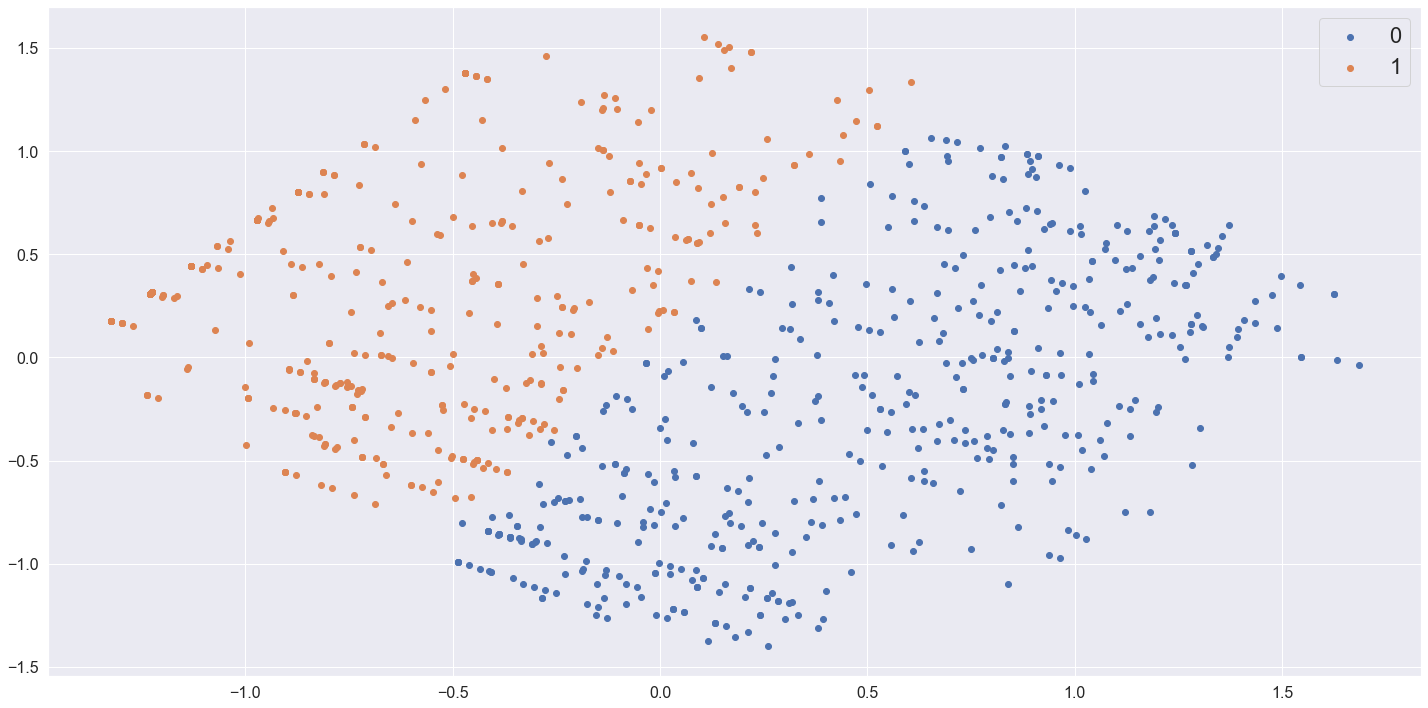

In [ ]:
labels=perform_my_kmeans(X, k=2)

In [ ]:
acc=sum(y==labels)/y.size
acc

0.3391304347826087